## N is a number of unit cells here!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy as sp

In [2]:
def SSH_hamiltonian_periodic(N1, Delta):
    N = N1*2
    x = np.zeros(N-1)
    x[0::2] = 1 - Delta
    x[1::2] = 1 + Delta
    A = np.diag(x, k = 1) + np.diag(x, k = -1)
    A[0][N-1] = 1 + Delta
    A[N-1][0] = 1 + Delta
    return A

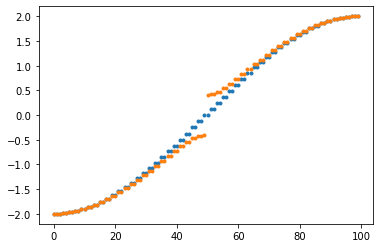

In [3]:
A_SSH = SSH_hamiltonian_periodic(50, 0)
A_SSH1 = SSH_hamiltonian_periodic(50, 0.2)
plt.plot(np.sort(np.linalg.eigvals(A_SSH)), ".")
plt.plot(np.sort(np.linalg.eigvals(A_SSH1)), ".")

In [4]:
def corr_matrix(N1, Delta):
    eps = 1e-15
    eigenvalues, eigenvectors = np.linalg.eigh(SSH_hamiltonian_periodic(N1, Delta))
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    N = N1*2
    Corr_matrix = np.zeros((N,N), dtype = "complex")    
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                Corr_matrix[i][j] += np.conjugate(eigenvectors[:,k][i])*(eigenvectors[:,k][j])
    return Corr_matrix  

In [5]:
Numer = 2
Delta1 = 0.5
corr_matrix(Numer, Delta1)[Numer:Numer*2, 0:Numer]

array([[ 1.11022302e-16+0.j, -5.00000000e-01+0.j],
       [-5.00000000e-01+0.j,  0.00000000e+00+0.j]])

In [6]:
corr_matrix(Numer, Delta1)

array([[ 5.00000000e-01+0.j, -5.55111512e-17+0.j,  1.11022302e-16+0.j,
        -5.00000000e-01+0.j],
       [-5.55111512e-17+0.j,  5.00000000e-01+0.j, -5.00000000e-01+0.j,
         0.00000000e+00+0.j],
       [ 1.11022302e-16+0.j, -5.00000000e-01+0.j,  5.00000000e-01+0.j,
        -5.55111512e-17+0.j],
       [-5.00000000e-01+0.j,  0.00000000e+00+0.j, -5.55111512e-17+0.j,
         5.00000000e-01+0.j]])

In [7]:
def corr_matrix_A(N1, Delta):
    return corr_matrix(N1, Delta)[0:N1, 0:N1]

In [8]:
def entang_entropy_A(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return S

In [9]:
def entang_entropy_A1(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):  
        S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
    return(S)

In [ ]:
M = 10
N = 50
Delta = np.linspace(-1,1,M)
Entropy_array = np.array([entang_entropy_A(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

# FOURIER Transform

In [ ]:
def u_func(k, Delta, N):
    lambda1 = (1 - Delta) + (1 + Delta)*np.exp(-(2*np.pi/N)*1j*k)
    s = np.sqrt(lambda1 / np.conjugate(lambda1))
    u1 = -(1/np.sqrt(2))*np.array([-1, s]) 
    u2 = -(1/np.sqrt(2))*np.array([1, s])
    return u1, u2 

Почему u_func не работает? Надо пересчитать! Что там с блоховскими состояниями?

In [ ]:
def u_func_new(k, Delta, N):
    H = np.array([[0, (1 - Delta) + (1 + Delta)*np.exp(-(2*np.pi/N)*1j*k)],[(1 - Delta) + (1 + Delta)*np.exp((2*np.pi/N)*1j*k), 0]])
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvectors

In [ ]:
N = 8
for k in range(N):
    print(u_func_new(k, 0.2, N)[:,0])

In [ ]:
for k in range(6):
    print(np.exp(1j*2*np.pi*k/N)/np.sqrt(2))

In [ ]:
def corr_matrix_new(N1, Delta):
    N = N1*2
    eps = 1e-15
    C = np.zeros((N,N),dtype = "complex")
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                    C[i][j] += (1/N1)*np.conjugate(u_func_new(k, Delta, N1)[:,0][i%2])*np.exp(-(2*np.pi/N1)*1j*k*(i//2 - j//2))*u_func_new(k, Delta, N1)[:,0][j%2]
    return C

In [ ]:
C = corr_matrix_A(10, 0.05)
eigenvalues = np.linalg.eigvalsh(C)
idx = eigenvalues.argsort()[::1]   
eigenvalues = eigenvalues[idx]
print(eigenvalues)
print(eigenvalues[-3-1] + eigenvalues[3])

In [ ]:
def corr_matrix_A_new(N, Delta):
    return corr_matrix_new(N, Delta)[0:N, 0:N]

In [ ]:
def entang_entropy_A_new(N, Delta):
    CM = corr_matrix_A_new(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return(S)

In [ ]:
M = 10
N = 10
Delta = np.linspace(-1,1,M)
Entropy_array_new = np.array([entang_entropy_A_new(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array_new, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

In [ ]:
#symmetry of the correlation matrix A

Num = 50
Delta = 0.9
S = corr_matrix_A(Num, Delta)
S_eigvals = np.linalg.eigvalsh(S)
S_new = []
for i in range(Num//2):
    S_new.append(S_eigvals[i] + S_eigvals[-i-1])
S_new = np.array(S_new)
print("S old = ", S_eigvals)
print("S new = ", S_new)

In [ ]:
def Z_n(n, alpha, eigenvalues, N1):
    Z = 1.0
    for m in range(N1):
        lam = eigenvalues[m]
        Z *= ((lam**n)*np.exp(1j*alpha*(1 - lam)) + ((1 - lam)**n)*np.exp(-1j*alpha*lam))
    return Z


#real Z_N expression

In [ ]:
def eigval_corr_matrix(N1,Delta):
    C = corr_matrix_A(N1, Delta)
    eigenvalues= np.linalg.eigvalsh(C)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    return eigenvalues

def Z_n_real(n, alpha, eigenvalues, N1):
    Z = 1.0
    for m in range(N1//2):
        lam = eigenvalues[m]
        Z *= (lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))
    return Z

'''def Z_n_real(n, alpha, Delta, N1):
    #alpha goes from -pi to pi
    C = corr_matrix_A(N1, Delta)
    eigenvalues= np.linalg.eigvalsh(C)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    Z = 1.0
    for m in range(N1//2):
        lam = eigenvalues[m]
        Z *= (lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))
    return Z'''

In [ ]:
'''N = 10
alpha_test = np.array([2*np.pi*j/N for j in range(N)])
Delta = 1
typ = 1
Z_n_test = np.array(Z_n(typ, alpha_test[i], Delta, N) for i in range(N))
plt.plot(alpha_test, Z_n_test)'''

In [ ]:
def log_Z_n(n, alpha, eigenvalues, N1):
    #alpha goes from 0 to 2 pi
    Z = 1.0
    for m in range(N1):
        lam = eigenvalues[m]
        Z += np.log(((lam**n)*np.exp(1j*alpha*(1 - lam)) + ((1 - lam)**n)*np.exp(-1j*alpha*lam)))
    return Z

In [ ]:
def log_Z_n_real(n, alpha, eigenvalues, N1):
    #alpha goes from 0 to 2 pi
    Z = 1.0
    for m in range(N1//2):
        lam = eigenvalues[m]
        Z += np.log(lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))
    return Z

In [ ]:
N_A = 50
N  = N_A + 1
type_num = 1

Delta_array = np.array([-1, 1,-0.5, 0.5, -0.2, 0.2, -0.1, 0.1, -0.01, 0.01])
alpha_array =  np.array([2*np.pi*i/N for i in range(N)])

In [ ]:
print(alpha_array) 
#do not count 0 2pi twice FOR ALPHA AND FOR Q

In [ ]:
A= eigval_corr_matrix(N_A, Delta_array[4])
Z_n_array0 = np.array([Z_n_real(type_num, alpha_array[i], A, N_A) for i in range(N)])
plt.plot(Z_n_array0)

In [ ]:
Corr_matrix_eigvals = []
for i in range(Delta_array.size):
    Corr_matrix_eigvals.append(eigval_corr_matrix(N_A, Delta_array[i]))

In [ ]:
Z_n_array = []
for j in range(Delta_array.size):
    Z_n_array.append(np.array([Z_n_real(type_num, alpha_array[i], Corr_matrix_eigvals[j], N_A) for i in range(N)]))

In [ ]:
# For delta = 1

plt.plot(alpha_array, Z_n_array[1], label = "numerical") #numerical result 
plt.plot(alpha_array, np.cos(alpha_array/2)**2, label = "theoretical") #theoretical result
plt.legend()
plt.title("$\delta$ = 1, N =" + str(N))

In [ ]:
for i in range(4):
    plt.plot(alpha_array, Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

In [ ]:
for i in range(4,Delta_array.size):
    plt.plot(alpha_array, Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

In [ ]:
N_A = 50
N  = N_A + 1
typ = 2

log_Z_n_array = []
for j in range(Delta_array.size):
    log_Z_n_array.append(np.array([log_Z_n_real(typ, alpha_array[i], Corr_matrix_eigvals[j], N_A) for i in range(N)]))

In [ ]:
for i in range(Delta_array.size//2):
    plt.plot(alpha_array, log_Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

In [ ]:
for i in range(Delta_array.size//2,Delta_array.size):
    plt.plot(alpha_array, log_Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

In [ ]:
def DFT(array):
#N should be even, if N is odd, you need to change np.concatenate((array_k[N//2:N], array_k[0:N//2])
    N = array.size
    array_k = np.zeros(N)
    for k in range(N):
        for i in range(N):
            array_k[k] += (1/np.sqrt(N))*(array[i]*np.cos(2*np.pi*k*i/(N)))
    return np.concatenate((array_k[(N//2+1):N], array_k[0:(N//2+1)]))

In [ ]:
def DFT_half(array):
    N = array.size
    array_k = np.zeros(N)
    for k in range(-N//2 + 1,N//2 + 1):
        array_k[k] = array[0]/(np.sqrt(N))
        for i in range(1,N//2 + 1):
            array_k[k] += 2*(1/np.sqrt(N))*(array[i]*np.cos(2*np.pi*k*i/(N)))
    return np.concatenate((array_k[(N//2+1):N], array_k[0:(N//2+1)]))

In [ ]:
print("half ", DFT_half(Z_n_array[1]))
print("full",  DFT(Z_n_array[1]))

In [ ]:
q_array = np.array([i for i in range(N)])

In [ ]:
plt.plot(q_array, DFT_half(Z_n_array[0]),".", label = "Delta = " + str(Delta_array[0]))
plt.legend()
plt.title("$Z_1 (q)$, $N_A$ = " + str(N_A))

In [ ]:
plt.plot(q_array, DFT(Z_n_array[1]),".", label = "Delta = " + str(Delta_array[1]))
plt.legend()
plt.title("$Z_1 (q)$, $N_A$ = " + str(N_A))
print("Z_N_array, delta = " + str(Delta_array[1]), Z_n_array[1], sep = "\n")

In [ ]:
def IDFT(array):
    N = array.size
    array = np.concatenate((array[(N//2):N], array[0:(N//2)]))
    array_k = np.zeros(N)
    for k in range(0,N):
        for i in range(0,N):
            array_k[k] += (1/(np.sqrt(N)))*(array[i]*np.cos(2*np.pi*k*i/N))
    return array_k

In [ ]:
plt.plot(alpha_array, IDFT(DFT(Z_n_array[1])))

In [ ]:
for i in range(Delta_array.size//2):
    plt.plot(q_array, DFT(Z_n_array[i]), label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1 (q)$, N = " + str(N))

In [ ]:
for i in range(Delta_array.size//2, Delta_array.size):
    plt.plot(q_array[q_array.size//2:q_array.size], DFT(Z_n_array[i])[q_array.size//2:q_array.size], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1 (q)$, N = " + str(N))
plt.rcParams["figure.figsize"] = (8,5.5)

In [ ]:
plt.plot(q_array[q_array.size//2:q_array.size], DFT(Z_n_array[5])[q_array.size//2:q_array.size], ".", label = "Delta = " + str(Delta_array[5]))
plt.legend()
plt.title("$Z_1 (q)$, N = " + str(N))

# Logarithm of $Z_1$

In [ ]:
#Here we only plot for q >= <q>, because of the symmetry
print(Delta_array[5])
Z_q = DFT(Z_n_array[5])[q_array.size//2:q_array.size]
Z_q_new = []
for i in range(Z_q.size):
    if Z_q[i] > 0:
        Z_q_new.append(Z_q[i])

plt.plot(np.log(Z_q_new), ".")

In [ ]:
print(np.exp(-32))

In [ ]:
print(np.log(DFT(Z_n_array[5])[q_array.size//2:q_array.size]))
print(DFT(Z_n_array[5])[q_array.size//2:q_array.size])

In [ ]:
plt.plot((q_array - q_array.size//2)**2, np.log(DFT(Z_n_array[1])), ".", label = "Delta = " + str(Delta_array[1]))
plt.legend()
plt.title("$\log Z_1 (q)$, N = " + str(N))

In [ ]:
plt.plot((q_array - q_array.size//2)**2, np.log(DFT(Z_n_array[2])), ".", label = "Delta = " + str(Delta_array[2]))
plt.legend()
plt.title("$\log Z_1 (q)$, N = " + str(N))